## 주식 데이터 분석
파이썬으로데이터주무르기7장 274p 구글주식에서 야후주식으로 변경하여 실습

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
#경고창무시?
import warnings
warnings.filterwarnings("ignore")
#TimeSeries분석
from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

### 기아자동차 주식

In [3]:
start = datetime(2013, 1, 1) #야후주식에서 8년치 정보제공
end = datetime(2020, 12, 4)
kia = pdr.DataReader('000270.KS', data_source='yahoo', start=start, end=end) #기아주식코드000270
kia.head() #저가 고가 종가 거래량??

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,57400.0,56000.0,57000.0,56300.0,2145047.0,56300.0
2013-01-03,56700.0,54100.0,56300.0,54600.0,4392999.0,54600.0
2013-01-04,54600.0,52700.0,54300.0,53600.0,3916692.0,53600.0
2013-01-07,54500.0,53600.0,53800.0,54000.0,2061988.0,54000.0
2013-01-08,54800.0,53700.0,53700.0,54500.0,1899832.0,54500.0


In [4]:
kia.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-30,60400.0,57800.0,58700.0,57800.0,3810442.0,57800.0
2020-12-01,60000.0,58100.0,58700.0,59800.0,1822248.0,59800.0
2020-12-02,61000.0,59400.0,60000.0,60800.0,2964672.0,60800.0
2020-12-03,64800.0,60000.0,60800.0,64700.0,4152306.0,64700.0
2020-12-04,66600.0,64300.0,65000.0,65400.0,3866516.0,65400.0


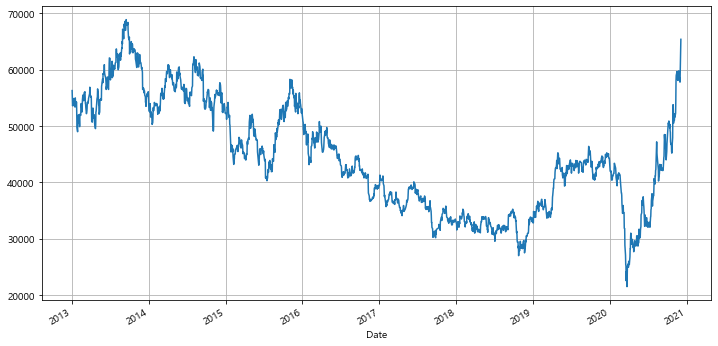

In [5]:
kia.Close.plot(figsize=(12,6), grid=True)
plt.show()
#2020.12월까지가 데이터입력한것, 그 이후 올라가는모양으로 예측한것이다.

In [6]:
kia_trunc = kia[:'2020-06-30'] #6월말까지의데이터로 7월예측을 해보자
kia_trunc.tail()
#기아차 주식값을 6월30일까지만 데이터를 주고 /나머지 예측해보자고~ 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-24,34450.0,32550.0,32700.0,33750.0,2345625.0,33750.0
2020-06-25,33200.0,32500.0,33050.0,32550.0,1495320.0,32550.0
2020-06-26,33500.0,32850.0,33100.0,33050.0,1329381.0,33050.0
2020-06-29,32500.0,31900.0,32300.0,32100.0,1259626.0,32100.0
2020-06-30,32650.0,32050.0,32600.0,32050.0,1193847.0,32050.0


In [7]:
#아까위에서 한 작업을 그대로 진행
df = pd.DataFrame({'ds': kia_trunc.index, 'y': kia_trunc.Close}) #kia_trunc.index와 종가를가지고  
df.reset_index(inplace=True)
del df['Date']  #ds컬럼만 남기려고
df.head()

,ds,y
0,2013-01-02,56300.0
1,2013-01-03,54600.0
2,2013-01-04,53600.0
3,2013-01-07,54000.0
4,2013-01-08,54500.0


In [8]:
model = Prophet(daily_seasonality=True) # 하이퍼파라메타를 (daily_seasonality=True)이걸로 주고
model.fit(df)  #학습하라

In [9]:
#그 다음 future퓨처에 어제것?2020.12.06까지 157일 넣음 (왜 157일인지 의문..??)
future = model.make_future_dataframe(periods=157)
future.tail()

,ds
1988,2020-11-30
1989,2020-12-01
1990,2020-12-02
1991,2020-12-03
1992,2020-12-04


In [10]:
forecast = model.predict(future) #이걸하고

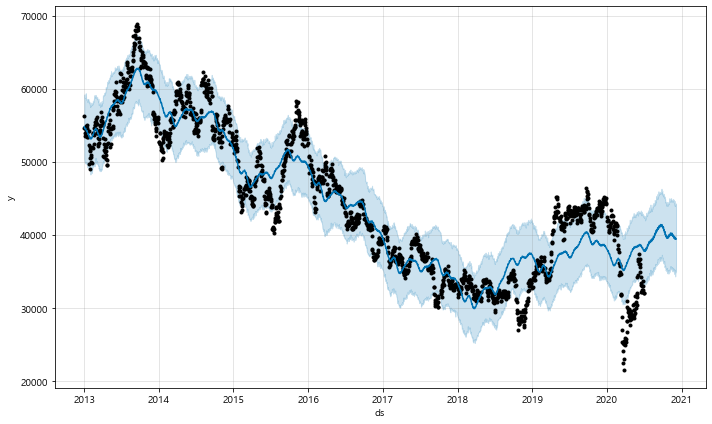

In [11]:
#그림그러야함(그래프)
model.plot(forecast);
#믿을게 못되는게.. 위에 분석한거는 위로 상승했는데, 이번그림은 상승안함;; 위에 분석한거랑 꼭 일치해야하나....;;;???

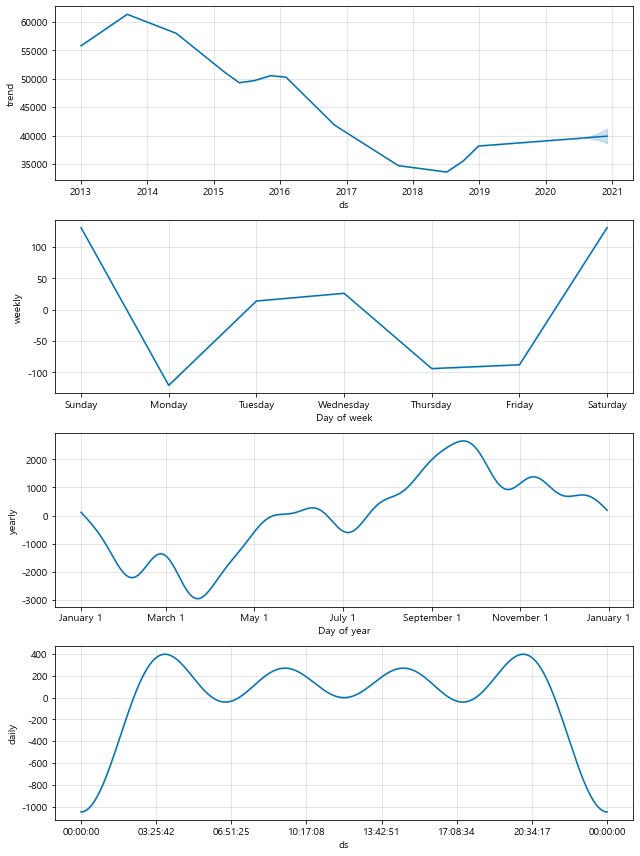

In [12]:
model.plot_components(forecast);
#요일별 시즌별 분석

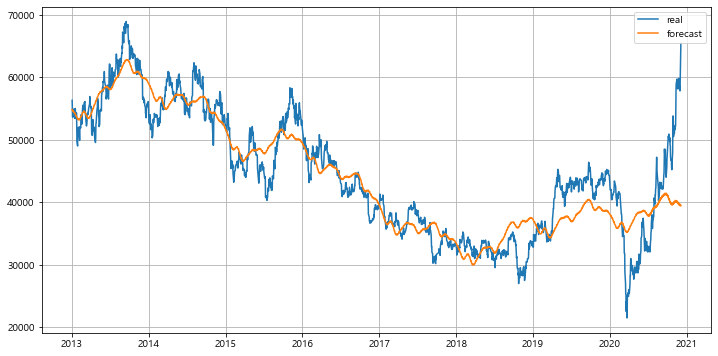

In [13]:
plt.figure(figsize=(12,6))
plt.plot(kia.index, kia.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()
#주황색이 예측
#파란색이 데이터를 준 실제값